In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,accuracy_score

In [3]:
dataset=pd.read_csv("C:/Users/user/Desktop/New Folder/Titanic/train.csv")

In [4]:
print(dataset)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

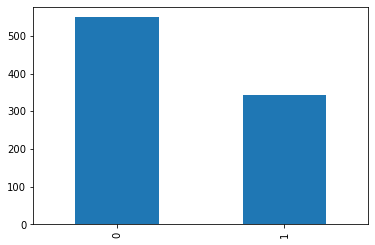

In [5]:
dataset.Survived.value_counts().plot(kind="bar")

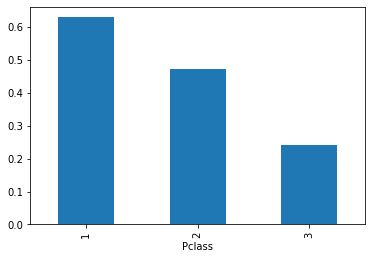

In [6]:
dataset[['Pclass','Survived']].groupby('Pclass').Survived.mean().plot(kind="bar")

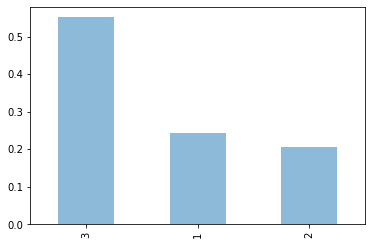

In [7]:
dataset.Pclass.value_counts(normalize=True).plot(kind="bar",alpha=0.5)

In [8]:
new_dataset=dataset[['Pclass','Sex','Age','SibSp','Fare','Parch']]

In [9]:
print(new_dataset)

     Pclass     Sex   Age  SibSp     Fare  Parch
0         3    male  22.0      1   7.2500      0
1         1  female  38.0      1  71.2833      0
2         3  female  26.0      0   7.9250      0
3         1  female  35.0      1  53.1000      0
4         3    male  35.0      0   8.0500      0
..      ...     ...   ...    ...      ...    ...
886       2    male  27.0      0  13.0000      0
887       1  female  19.0      0  30.0000      0
888       3  female   NaN      1  23.4500      2
889       1    male  26.0      0  30.0000      0
890       3    male  32.0      0   7.7500      0

[891 rows x 6 columns]


### checking the NAN values in dataset

In [10]:
new_dataset.isnull().sum()

Pclass      0
Sex         0
Age       177
SibSp       0
Fare        0
Parch       0
dtype: int64

In [11]:
new_dataset.Age.agg(['max','min','mean','median'])

max       80.000000
min        0.420000
mean      29.699118
median    28.000000
Name: Age, dtype: float64

In [12]:
new_dataset.fillna({'Age':new_dataset.Age.mean()},inplace=True)

C:\Users\user\miniconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [13]:
print(new_dataset)

     Pclass     Sex        Age  SibSp     Fare  Parch
0         3    male  22.000000      1   7.2500      0
1         1  female  38.000000      1  71.2833      0
2         3  female  26.000000      0   7.9250      0
3         1  female  35.000000      1  53.1000      0
4         3    male  35.000000      0   8.0500      0
..      ...     ...        ...    ...      ...    ...
886       2    male  27.000000      0  13.0000      0
887       1  female  19.000000      0  30.0000      0
888       3  female  29.699118      1  23.4500      2
889       1    male  26.000000      0  30.0000      0
890       3    male  32.000000      0   7.7500      0

[891 rows x 6 columns]


In [14]:
new_dataset.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Fare      0
Parch     0
dtype: int64

In [15]:
dataset1 = pd.get_dummies(new_dataset['Sex'])

In [16]:
print(dataset1)

     female  male
0         0     1
1         1     0
2         1     0
3         1     0
4         0     1
..      ...   ...
886       0     1
887       1     0
888       1     0
889       0     1
890       0     1

[891 rows x 2 columns]


In [17]:
dataset2=new_dataset.select_dtypes(exclude=['object'])

In [18]:
final_dataset=pd.concat((dataset1,dataset2),axis=1)

In [19]:
print(final_dataset)

     female  male  Pclass        Age  SibSp     Fare  Parch
0         0     1       3  22.000000      1   7.2500      0
1         1     0       1  38.000000      1  71.2833      0
2         1     0       3  26.000000      0   7.9250      0
3         1     0       1  35.000000      1  53.1000      0
4         0     1       3  35.000000      0   8.0500      0
..      ...   ...     ...        ...    ...      ...    ...
886       0     1       2  27.000000      0  13.0000      0
887       1     0       1  19.000000      0  30.0000      0
888       1     0       3  29.699118      1  23.4500      2
889       0     1       1  26.000000      0  30.0000      0
890       0     1       3  32.000000      0   7.7500      0

[891 rows x 7 columns]


In [20]:
x=final_dataset

In [21]:
print(x)

     female  male  Pclass        Age  SibSp     Fare  Parch
0         0     1       3  22.000000      1   7.2500      0
1         1     0       1  38.000000      1  71.2833      0
2         1     0       3  26.000000      0   7.9250      0
3         1     0       1  35.000000      1  53.1000      0
4         0     1       3  35.000000      0   8.0500      0
..      ...   ...     ...        ...    ...      ...    ...
886       0     1       2  27.000000      0  13.0000      0
887       1     0       1  19.000000      0  30.0000      0
888       1     0       3  29.699118      1  23.4500      2
889       0     1       1  26.000000      0  30.0000      0
890       0     1       3  32.000000      0   7.7500      0

[891 rows x 7 columns]


In [22]:
y=dataset.Survived.values

In [23]:
print(y)

[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1
 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 1 0 1 0 0 1 0 0 0 

In [24]:
print(x.ndim)

2


In [25]:
import sklearn

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=1)

In [27]:
print(x_train)

     female  male  Pclass        Age  SibSp     Fare  Parch
301       0     1       3  29.699118      2  23.2500      0
309       1     0       1  30.000000      0  56.9292      0
516       1     0       2  34.000000      0  10.5000      0
120       0     1       2  21.000000      2  73.5000      0
570       0     1       2  62.000000      0  10.5000      0
..      ...   ...     ...        ...    ...      ...    ...
715       0     1       3  19.000000      0   7.6500      0
767       1     0       3  30.500000      0   7.7500      0
72        0     1       2  21.000000      0  73.5000      0
235       1     0       3  29.699118      0   7.5500      0
37        0     1       3  21.000000      0   8.0500      0

[712 rows x 7 columns]


In [28]:
print(x_test)

     female  male  Pclass        Age  SibSp     Fare  Parch
862       1     0       1  48.000000      0  25.9292      0
223       0     1       3  29.699118      0   7.8958      0
84        1     0       2  17.000000      0  10.5000      0
680       1     0       3  29.699118      0   8.1375      0
535       1     0       2   7.000000      0  26.2500      2
..      ...   ...     ...        ...    ...      ...    ...
796       1     0       1  49.000000      0  25.9292      0
815       0     1       1  29.699118      0   0.0000      0
629       0     1       3  29.699118      0   7.7333      0
421       0     1       3  21.000000      0   7.7333      0
448       1     0       3   5.000000      2  19.2583      1

[179 rows x 7 columns]


In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
log=LogisticRegression(C=0.001)

In [31]:
log.fit(x_train,y_train)

LogisticRegression(C=0.001)

In [32]:
log.score(x_train,y_train)

0.6924157303370787

In [33]:
y_pred_log=log.predict(x_test)

In [34]:
print(y_pred_log)

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0]


In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
cm_log=confusion_matrix(y_test,y_pred_log)

In [37]:
print(cm_log)

[[102   4]
 [ 59  14]]


In [38]:
acc_logistic_tree=round(log.score(x_train,y_train) * 100, 2)

In [39]:
log_ac=classification_report(y_test, y_pred_log,output_dict=True)
log_acc=round(log_ac['accuracy']*100,2)

In [40]:
print(log_acc)

64.8


In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
random=RandomForestClassifier()

In [43]:
random.fit(x_train,y_train)

RandomForestClassifier()

In [44]:
random.score(x_test,y_test)

0.7821229050279329

In [45]:
y_pred_random=random.predict(x_test)

In [46]:
print(y_pred_random)

[1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0 1
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1]


In [47]:
cm_random=confusion_matrix(y_test,y_pred_random)

In [48]:
print(cm_random)

[[98  8]
 [31 42]]


In [49]:
acc_randomForest_tree=round(random.score(x_train,y_train) * 100, 2)

In [50]:
random_ac=classification_report(y_test, y_pred_random,output_dict=True)
random_acc=round(random_ac['accuracy']*100,2)

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
decision=DecisionTreeClassifier()

In [53]:
decision.fit(x_train,y_train)

DecisionTreeClassifier()

In [54]:
y_pred_decision=decision.predict(x_test)

In [55]:
print(y_pred_decision)

[1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0 1
 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1
 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1]


In [56]:
cm_decision=confusion_matrix(y_test,y_pred_decision)

In [57]:
print(cm_decision)

[[89 17]
 [28 45]]


In [58]:
acc_decision_tree=round(decision.score(x_train,y_train)*100,2)

In [59]:
decision_ac=classification_report(y_test, y_pred_decision,output_dict=True)
decision_acc=round(decision_ac['accuracy']*100,2)

In [60]:
from sklearn.svm import SVC,LinearSVC

In [61]:
linear_svc = LinearSVC()

In [62]:
linear_svc.fit(x_train, y_train)

C:\Users\user\miniconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC()

In [63]:
y_pred_linear_svc=linear_svc.predict(x_test)

In [64]:
print(y_pred_linear_svc)

[1 0 1 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0
 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0
 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1
 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 0 1]


In [65]:
cm_linear_svc=confusion_matrix(y_test,y_pred_linear_svc)

In [66]:
print(cm_linear_svc)

[[84 22]
 [20 53]]


In [67]:
acc_svc_tree=round(linear_svc.score(x_train,y_train) * 100, 2)

In [68]:
svc_ac=classification_report(y_test, y_pred_linear_svc,output_dict=True)
svc_acc=round(svc_ac['accuracy']*100,2)

In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
knn=KNeighborsClassifier(n_neighbors=21, metric="euclidean", p=2)

In [71]:
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=21)

In [72]:
knn.score(x_test,y_test)

0.6759776536312849

In [73]:
y_pred_knn = knn.predict(x_test)

In [74]:
print(y_pred_knn)

[0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1
 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0
 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 0 0 0
 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1]


In [75]:
cm_knn=confusion_matrix(y_test,y_pred_knn)

In [76]:
print(cm_knn)

[[87 19]
 [39 34]]


In [77]:
acc_knn_tree=round(knn.score(x_train,y_train) * 100, 2)

In [78]:
knn_ac=classification_report(y_test, y_pred_knn,output_dict=True)
knn_acc=round(knn_ac['accuracy']*100,2)

In [79]:
models = pd.DataFrame({'Model': ['Logistic Regression', 'KNN', 'Linear SVC','Random Forest', 'Decision Tree'],'Training Accuracy': [acc_logistic_tree, acc_knn_tree,acc_svc_tree,acc_randomForest_tree, acc_decision_tree],'Testing Accuracy':[log_acc,knn_acc,svc_acc,random_acc,decision_acc]})

In [80]:
print(models)

                 Model  Training Accuracy  Testing Accuracy
0  Logistic Regression              69.24             64.80
1                  KNN              74.16             67.60
2           Linear SVC              76.40             76.54
3        Random Forest              98.74             78.21
4        Decision Tree              98.74             74.86


In [84]:
print(accuracy_score(y_test,y_pred_log))

0.6480446927374302


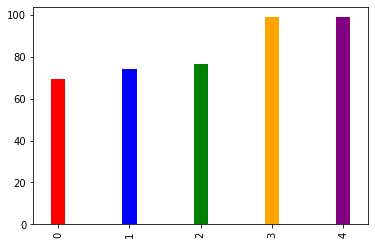

In [81]:
models['Training Accuracy'].plot(kind="bar",tick_label=models['Model'],width=0.2,color=['red','blue','green','orange','purple'])

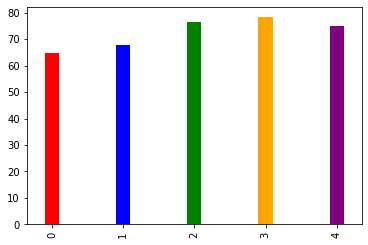

In [82]:
models['Testing Accuracy'].plot(kind="bar",tick_label=models['Model'],width=0.2,color=['red','blue','green','orange','purple'])

0.6480446927374302


In [85]:
from sklearn.feature_selection import SelectKBest